# cifar10 辨識

## 步驟1：載入 cifar10 資料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 cifar10 資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 轉成單色

In [2]:
# 轉成單色：rgb_to_grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [3]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255, x_test / 255

In [4]:
# 確認轉換成功
x_train_norm[0]

<tf.Tensor: shape=(32, 32, 1), dtype=float32, numpy=
array([[[0.23921569],
        [0.1764706 ],
        [0.1882353 ],
        ...,
        [0.5372549 ],
        [0.50980395],
        [0.5058824 ]],

       [[0.07058824],
        [0.        ],
        [0.03921569],
        ...,
        [0.36862746],
        [0.3529412 ],
        [0.36862746]],

       [[0.09411765],
        [0.03137255],
        [0.12156863],
        ...,
        [0.3529412 ],
        [0.35686275],
        [0.3137255 ]],

       ...,

       [[0.6784314 ],
        [0.6039216 ],
        [0.6117647 ],
        ...,
        [0.5254902 ],
        [0.13725491],
        [0.14901961]],

       [[0.57254905],
        [0.5019608 ],
        [0.56078434],
        ...,
        [0.59607846],
        [0.27058825],
        [0.23137255]],

       [[0.5882353 ],
        [0.53333336],
        [0.5764706 ],
        ...,
        [0.7372549 ],
        [0.4862745 ],
        [0.3882353 ]]], dtype=float32)>

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

## 步驟6：結合訓練資料及模型，進行模型訓練

## 步驟7：評分(Score Model)

In [5]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:3]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 16s 10ms/step - loss: 2.1245 - accuracy: 0.2178 - val_loss: 2.0307 - val_accuracy: 0.2651
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0365 - accuracy: 0.2605 - val_loss: 2.0073 - val_accuracy: 0.2808
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0102 - accuracy: 0.2715 - val_loss: 1.9451 - val_accuracy: 0.3058
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9935 - accuracy: 0.2790 - val_loss: 1.9429 - val_accuracy: 0.3054
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9765 - accuracy: 0.2877 - val_loss: 1.9374 - val_accuracy: 0.3159
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9636 - accuracy: 0.2961 - val_loss: 1.9027 - val_accuracy: 0.3254
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.9580 - accuracy: 0.2941 - val_loss: 1.9144 - val_accuracy: 0.3236

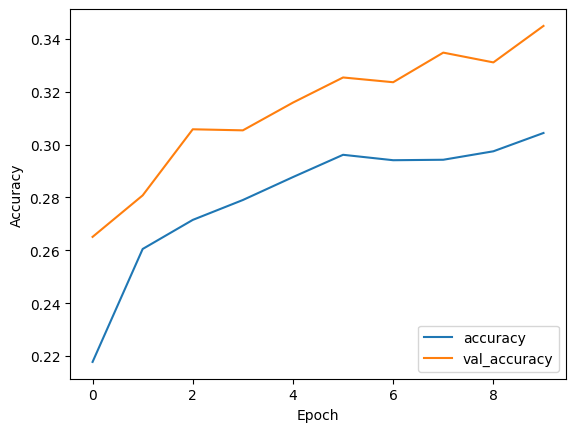

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 132490 (517.54 KB)
Trainable params: 132490 (517.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


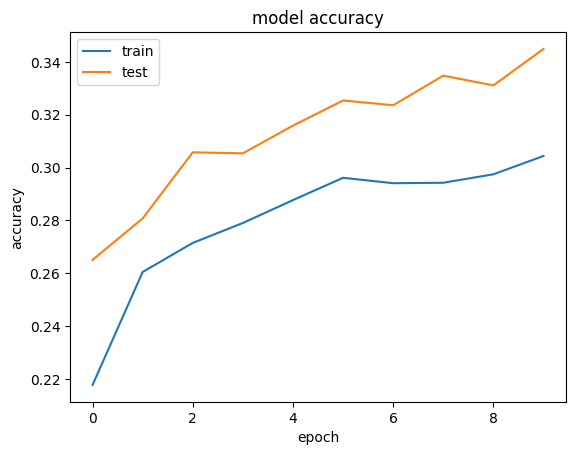

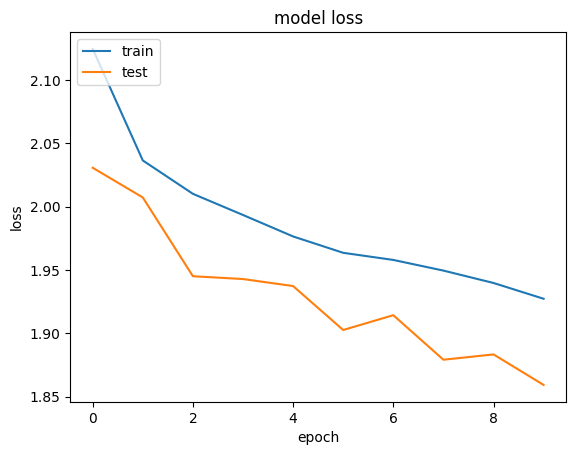

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()